Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
STUDENT_ID = ""

---

# MTH765P - Coursework 3
This is a template notebook for the third coursework assignment for MTH765P,
Closely follow the instructions in this template in order 
to complete the assessment and to obtain full marks. Please only
modify cells where you are instructed to do so. Note that you may add other cells.
Failure to comply may result in unexpected errors that can lead to mark deductions. **Please submit only this file, without changing its name to QMPlus.**


##### DO NOT FORGET TO REMOVE THE LINE  _raise NotImplementedError()_ after you answer the question.

Author: Primoz Skraba


As usual, we begin by loading the necessary libraries. You should not 
import any other libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


---------
---------
 
 1.) Linear models and residuals

--------
--------

Run the next cell to load the first dataset.

--------




In [2]:
X = pd.read_csv('1.csv',sep=' ')
X.head()
len(X)

300

----

a.) Use _numpy.polyfit()_ to fit a linear model to the data, storing the parameters into variables called _m_ and _b_ respectively for the slope and y-intercept. 

----

In [3]:
m, b = np.polyfit(X["x"], X["y"], 1)

In [4]:
m, b

(6.523699151548956, -8.234591505946511)

----

b.) Compute the residual of the data with respect to the model and store them in a variable called _res_

----

In [5]:
res_df=np.polyval(np.polyfit(X["x"], X["y"], 1), X["x"]) - X["y"]**2
res=res_df

In [6]:
res

0     -1623.837361
1      -382.065828
2      -284.041612
3      -143.664928
4      -382.929534
          ...     
295   -2986.722790
296   -3347.462024
297      -1.564446
298     -89.859725
299     -33.978509
Name: y, Length: 300, dtype: float64

----

c.) Plot an unnormalised histogram of the residuals with 40 bins

----

(array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,
          0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   2.,
          1.,   3.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,   1.,
          2.,   2.,   3.,  10.,  31.,  60., 174.]),
 array([-3.98364555e+03, -3.88409352e+03, -3.78454150e+03, -3.68498947e+03,
        -3.58543744e+03, -3.48588541e+03, -3.38633338e+03, -3.28678136e+03,
        -3.18722933e+03, -3.08767730e+03, -2.98812527e+03, -2.88857325e+03,
        -2.78902122e+03, -2.68946919e+03, -2.58991716e+03, -2.49036514e+03,
        -2.39081311e+03, -2.29126108e+03, -2.19170905e+03, -2.09215703e+03,
        -1.99260500e+03, -1.89305297e+03, -1.79350094e+03, -1.69394892e+03,
        -1.59439689e+03, -1.49484486e+03, -1.39529283e+03, -1.29574080e+03,
        -1.19618878e+03, -1.09663675e+03, -9.97084722e+02, -8.97532694e+02,
        -7.97980667e+02, -6.98428639e+02, -5.98876611e+02, -4.99324584e+02,
        -3.99772556e+02, -3.00220529e+02, 

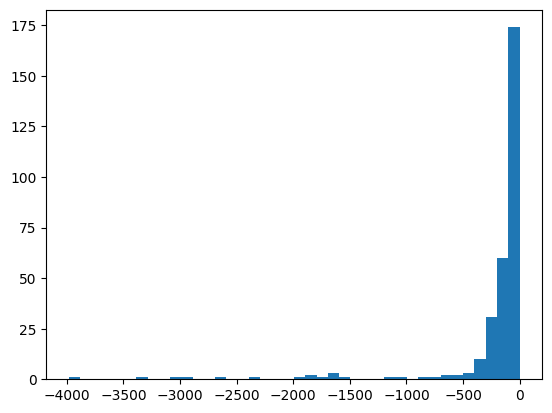

In [7]:
plt.hist(res, bins=40)

----

d.) Is the linear model a good fit? (one or two sentences)

----

YOUR ANSWER HERE
yes the linear model is a good fit because the linear model works really great for 2 variable and here only two variables are given which are X["x"] and X["y"] ,also linear model are used for drawing a line and predicting

----

e.) Complete the function below to compute hinges of the input x, which should be set at the 30th and 70th quantile.

----

In [8]:
def hinges(x):
    k = sorted(x)
    k = pd.Series(k)
    # median = k.median()
    lower = k.iloc[round(len(k) * 0.3)]
    upper = k.iloc[round(len(k) * 0.7)]
    return lower, upper

----

f.) Use the above function to compute the inner fences of the residuals. Store the results in the variables _lower_fence_ and _upper_fence_ respectively.

----

In [9]:
lower_fence, upper_fence = hinges(res)

In [10]:
lower_fence, upper_fence

(-145.80476045015865, -27.109195533432988)

----

g.) Create a new Dataframe called _Y_ with all the values corresponding to residuals which are beyond the inner fences removed.

----

In [14]:
sorted_res = sorted(res)
x = X.iloc[:sorted_res.index(lower_fence)]
y = X.iloc[sorted_res.index(upper_fence)+1:]

In [15]:
Y = pd.concat([x, y], ignore_index=True)

In [16]:
Y

,x,y
0,-1.167390,-40.099714
1,-1.082710,-19.151187
2,-1.063447,-16.397238
3,-1.061148,-11.336125
4,-0.993360,-19.188918
...,...,...
174,1.017310,-54.636296
175,1.029627,-57.844139
176,1.038887,-0.327475
177,1.081022,9.416868


----

h.) Fit a new linear model and plot the  outliers as red points, the remainder of the points (non-outliers) as blue stars (\*), the original model as a black line and the new model shown as a green line. Store the new model parameters in the variables _m\_new_ and _b\_new_.

----

C:\Users\annup\AppData\Local\Temp\ipykernel_4900\440155031.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y*" (-> color='y'). The keyword argument will take precedence.
  plt.plot(Y["x"], Y["y"], 'y*', Y["x"], m*Y["x"]+b, '--k', color= "blue")
C:\Users\annup\AppData\Local\Temp\ipykernel_4900\440155031.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot(Y["x"], Y["y"], 'y*', Y["x"], m*Y["x"]+b, '--k', color= "blue")


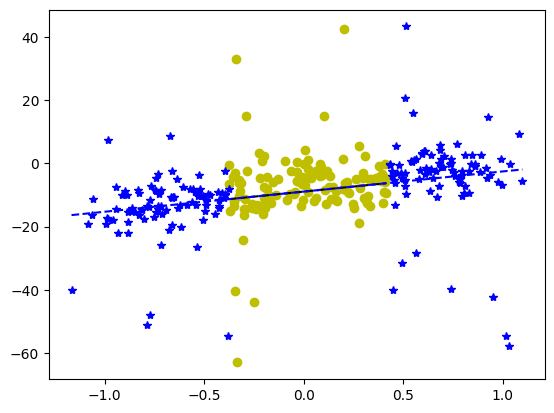

In [30]:
m, b = np.polyfit(Y["x"], Y["y"], 1)
X1 = X.iloc[sorted_res.index(lower_fence):sorted_res.index(upper_fence)]

plt.plot(X1["x"], X1["y"], 'yo', X1["x"], m*X1["x"]+b, '--k' )
plt.plot(Y["x"], Y["y"], 'y*', Y["x"], m*Y["x"]+b, '--k', color= "blue")

----

j.) Is what you did above different from computing (and filtering) the outliers on the original data? If so, describe how, otherwise explain why they are the same. (a few sentences)

----

YOUR ANSWER HERE

### 2.)

The next dataset is on the sales of video games. 

---------
---------

a.) Use pandas to read in the file **games.csv** into a dataframe called _games_



In [18]:
games = pd.read_csv('2.csv')
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37



 ----
 
a.) Find answers to the following questions about the dataframe.
- How many genres are there? Store the answer in a variable called _num_genres_. 
- How many publishers are there? Store the answer in a variable _num_publishers_.
- How many platforms are there? Store the answer in a variable _num_platforms_.

----


In [19]:
# finding the count of genres
num_genres = len(games["Genre"].unique())

# finding the number of publishers
num_publishers = len(games["Publisher"].unique())

# finding the number of platforms
num_platforms = len(games["Platform"].unique())

In [20]:
num_genres, num_publishers, num_platforms

(12, 579, 31)

----

b.) Create a box-and-whisker plot of Global Sales by genre.

----

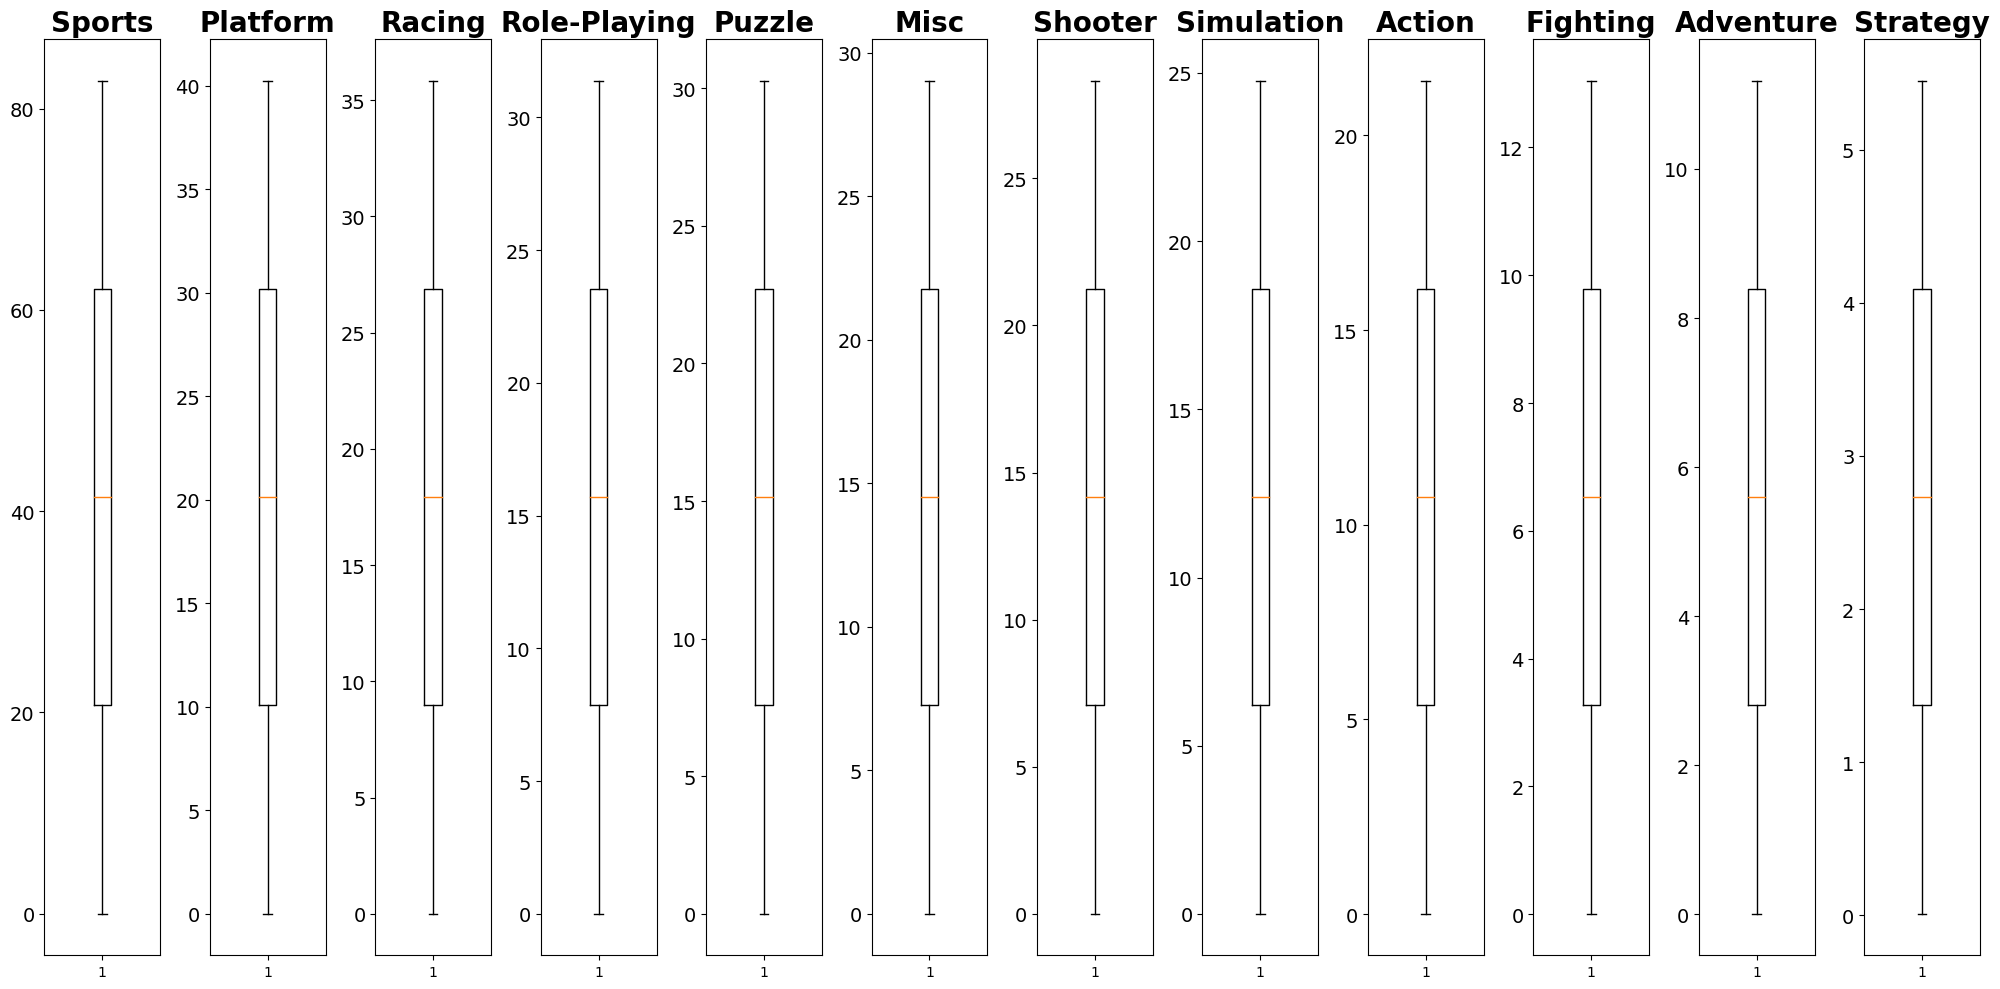

In [6]:
# %matplotlib inline

fig, axs = plt.subplots(1, num_genres, figsize = (20, 10))
genres = (x for x in games["Genre"].unique())

for i, ax in enumerate(axs.flat):
    genre = next(genres)
    global_sales = games[games["Genre"] == genre]["Global_Sales"]
    val_min = global_sales.min()
    val_max = global_sales.max()
    val_75 = global_sales.sum() * 0.75
    val_25 = global_sales.sum() * 0.25
    ax.boxplot((val_min, val_max))
    ax.set_title(genre, fontsize=20, fontweight="bold")
    ax.tick_params(axis='y', labelsize=14)
plt.tight_layout()

----

c.) Find the upper outer fence thresholds for each genre (assuming hinges at the 25th and 75th percentile). Store them in a dictionary {genre:upper outer fence} called ufence.

---

In [9]:
genre_outer_fence_dict = dict()

for genre in games["Genre"].unique():
    global_sales = games[games["Genre"] == genre]["Global_Sales"]

    Q3 = global_sales.sum() * 0.75
    Q1 = global_sales.sum() * 0.25

    iqr = Q3 - Q1
    upper_fence = Q3 + (1.5 * iqr)
    genre_outer_fence_dict[genre] = upper_fence


In [10]:
genre_outer_fence_dict

{'Sports': 1996.395,
 'Platform': 1247.0550000000003,
 'Racing': 1098.06,
 'Role-Playing': 1391.0550000000003,
 'Puzzle': 367.42499999999995,
 'Misc': 1214.9400000000005,
 'Shooter': 1556.0550000000003,
 'Simulation': 588.3000000000002,
 'Action': 2626.7699999999995,
 'Fighting': 673.365,
 'Adventure': 358.55999999999995,
 'Strategy': 262.68000000000006}

----

d.) Plot the unnormalised histogram with 20 bins for all sports games whose Global sales which are beyond the outer fence.


----


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

---- 
e.) If these are successful games - what can you say about the maximum versus the typical successful game? What are the problems with using the average (overall or just the succesful games).

---

YOUR ANSWER HERE

----

f.) Create a plot of Global Sales with a line for the following platforms per year.
- 2600, NES, SNES, GEN, N64, GC, WII, PS, PS2, PS3, PS4, X360, XB, XOne

----


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()